In [1]:
# The code have been made with inspiration from https://www.kaggle.com/koshirosato/bee-or-wasp-base-line-using-resnet50

import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow.keras.layers import *
from tqdm import tqdm
import skimage.color
import skimage.io
import skimage.viewer

/opt/anaconda3/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [2]:
# %%
# Setting up constants
SEED = 5

# Reading in the lables file
df = pd.read_csv('labels.csv')


In [3]:
# %%
def seed_everything(seed):
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.random.set_seed(seed)

seed_everything(SEED)

In [16]:
# %%
# Replace \ with / to make the path work
for idx in tqdm(df.index):    
    df.loc[idx,'path']=df.loc[idx,'path'].replace('\\', '/') 

df.tail()


100%|██████████| 7035/7035 [00:02<00:00, 3418.65it/s]


,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
10560,10561,other_insect/9810760654_bdb1be0ca9_n.jpg,0,0,1,0,1,0,1,insect
10561,10562,other_insect/9927015603_d1e391b19c_n.jpg,0,0,1,0,1,0,0,insect
10562,10563,other_insect/9955062984_735ded0bd9_m.jpg,0,0,1,0,1,0,1,insect
10563,10564,other_insect/996747215_4e193720ca_n.jpg,0,0,1,0,1,0,0,insect
10564,10565,other_insect/9996785066_c8633e76a2_w.jpg,0,0,1,0,1,0,0,insect


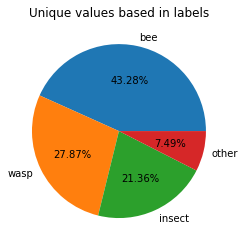

In [5]:
# %%
# Show the procent of images that have the diffrent labels
labels = list(df['label'].unique())
y = list(df['label'].value_counts())
plt.pie(y, labels=labels, autopct='%1.2f%%')
plt.title('Unique values based in labels')
plt.show()

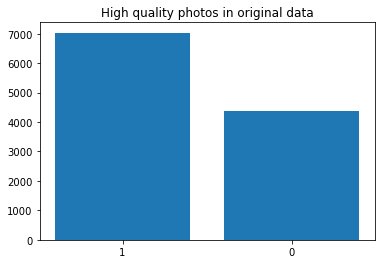

In [6]:
# %%
labels = list(df['photo_quality'].unique())
x = range(0, 2)
y = list(df['photo_quality'].value_counts())
plt.bar(x, y, tick_label=labels)
plt.title('High quality photos in original data')

plt.show()

In [7]:
def img_plot(df, label):
    df = df.query('label == @label')
    imgs = []
    for path in df['path'][:4]:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)
    f, ax = plt.subplots(2, 2, figsize=(10,10))
    for i, img in enumerate(imgs):
        ax[i//2, i%2].imshow(img)
        ax[i//2, i%2].axis('off')
        ax[i//2, i%2].set_title('label: %s' % label)
    plt.show()

In [8]:
def hist_plot(df, label):
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    df = df.query('label == @label')
    imgs = []
    for path in df['path'][:2200]:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)

        plt.xlim([0, 256])

    imgs_resize = []

    for img in imgs:
        width = 40
        height = 40
        dim = (width, height)
        image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        imgs_resize.append(image)

    for channel_id, c in zip(channel_ids, colors):
        for image in imgs_resize:
            histogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
            plt.plot(bin_edges[0:-1], histogram, color=c)

    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.show()


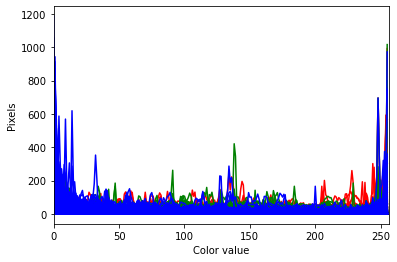

In [9]:
hist_plot(df, label='bee')

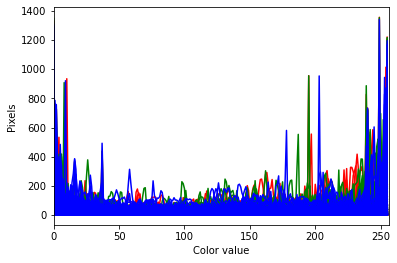

In [10]:
hist_plot(df, label='wasp')

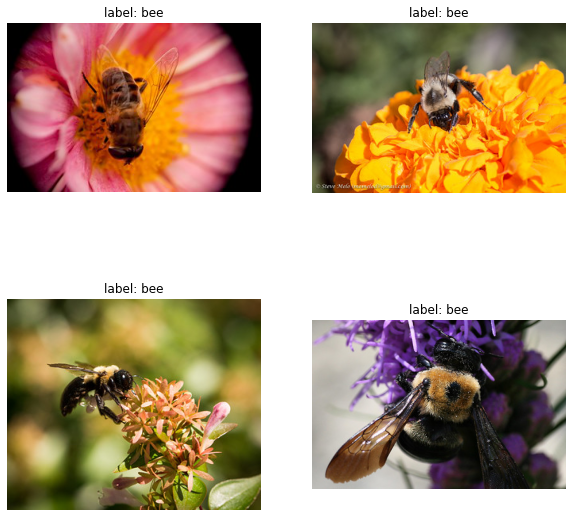

In [11]:
img_plot(df, label='bee')

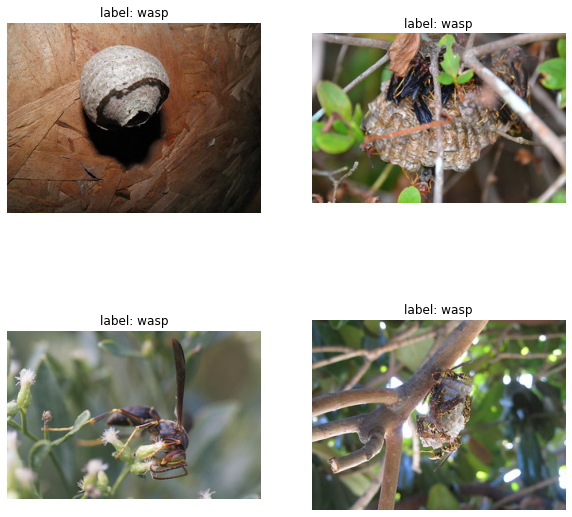

In [12]:
img_plot(df, label='wasp')

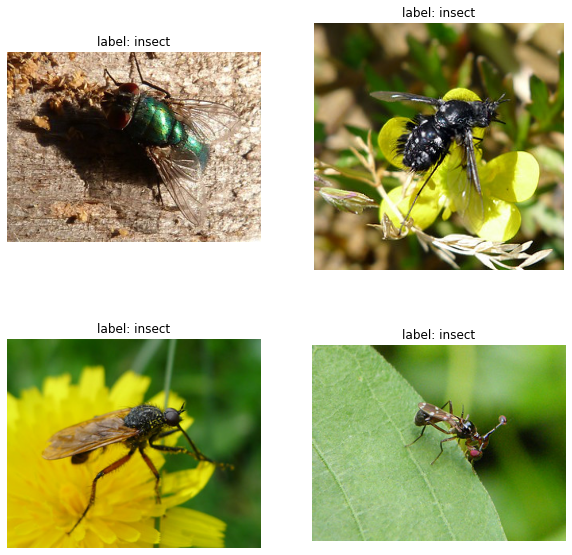

In [13]:
img_plot(df, label='insect')

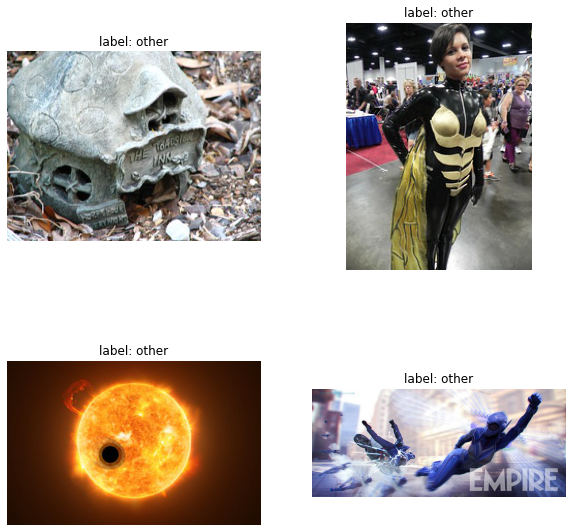

In [14]:
img_plot(df, label='other')

In [15]:
df = df.query('photo_quality == 1')
df['label'].value_counts()

bee       2469
insect    2439
wasp      2127
Name: label, dtype: int64